<a href="https://colab.research.google.com/github/VioletKimble/AIM_AHEAD/blob/main/AIM_AHEAD_Notebook_3_Introduction_to_Machine_Learning_for_Clinical_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://www.dropbox.com/scl/fi/bvwvq5lo4s32o2benttys/header.png?rlkey=iglro5700vvl27390wuw2j3yn&st=sia7zi1u&raw=1"/></center>

# 🏥 **Machine Learning for Clinical Care**

In this notebook, we will demonstrate how to develop machine learning (ML) prediction models using real-world patient datasets from electronic health record (EHR) systems.

#### **🎯 After completing this module, you will be able to...**
* Explain the lifecycle of typical machine learning (ML) projects.
* Extract and engineer features using the pandas and scikit-learn libraries.
* Train, evaluate, and explain an XGBoost machine learning model.
* Explain the principles and mechanics of deep learning and artificial neural networks.
* Describe the biological inspiration for artificial neural networks (ANN).
* Explain at a basic level how the Perceptron model (one of the simplest ANNs) processes input data.
* Identify the important role of activation functions in ANNs.
* Demonstrate your understanding of the Keras API by creating a simple neural network.

#### **🚀 Let's get started!**

## ⚕️ Real-World Clinical AI
Artificial intelligence applications of machine learning in healthcare are not hypothetical - they are already here! As of February 2025, the FDA has authorized more than 1,000 AI-enabled devices and/or algorithms. The pace of authorizations is also increasing at an accelerating rate. The latest FDA update was in September 2024. By the time you are reading this, there have likely been many more successful AI authorizations.

<center>
<style>
    .figure { display: inline-block; }
</style>

<figure>
    <figcaption><b>Total FDA authorizations of AI/ML technology associated with medical specialties.</b></figcaption>
    <img src="https://www.dropbox.com/scl/fi/kxshrlke4khcn7jsm6woh/fda_specialties.png?rlkey=xel4hx3h96pml2btxol7975hn&raw=1" width="55%" />
</figure>

<br>


<figure>
    <figcaption><b>Year-over-year FDA authorizations of AI/ML-enabled medical devices.</b></figcaption>
    <img src="https://www.dropbox.com/scl/fi/02stquhohfxkzpq4cmupz/fda_yoy.png?rlkey=rc8mlk1e4bxzpjkh3085bggpn&raw=1" width="75%" />
</figure>

</center>


## 🤝 AI-Augmented Clinical Decision Support
* Predictive AI systems have the potential to support clinical decision-making through earlier identification of at-risk patients, personalized interventions, and theability to mitigate harm resulting from potential cognitive errors in high-pressure clinical environments.
* AI can help quantify each patient's unique underlying risk profile, which is based on numerous complex factors including demographic characteristics, comorbid conditions, physiological reserve, medications, and more.
* While present-day hospital AI systems largely utilize large language models (LLMs) to automate documentation and administrative tasks, predictive models may be able to forecast patient trajectories from complex, multimodal patterns discovered in massive electronic health records (EHR) datasets.

## 🔄 Machine Learning Lifecycle
Shown below are the major steps that are involved in a typical ML lifecycle.

<center><img src="https://www.dropbox.com/scl/fi/i6k1dynv7y2gv7r98lm86/ml.png?rlkey=2iil5vht6jiuvqm1e1i2l56xs&st=95ql0w9f&raw=1" alt="ML lifecycle" width="50%"></center>
<center><b>The machine learning lifecycle.</b></center>


#### 🛠️ Data Extraction and Processing
* Relevant data must be extracted (example: all revelant laboratory values and vital signs).
* Data quality and conformation to modeling requirements must be ensured through data preprocessing (example: fixing the missing data, removing any unwanted outliers, and encoding the categorical data.)
  
#### 🏗️ Model development
* Machine learning models are built from data.
* Recall our module on functions: an ML model can be thought of as a **function** that maps a set of input values (example: patient characteristics) to an output value (example: probability of developing AKI).
* We develop a model on data from a **training** cohort.
* During the model refinement stage, known as **training**, model parameters (such as *weights* and *biases*) are altered to optimize the associations between inputs and outputs.
* After training, a model is ready to make predictions on *new data it has not seen before*. But how accurate will it be?

#### 🔎 Evaluation and Intepretation
* Once a ML model is trained, we evaluate the end result on **testing** dataset to see how well the model performed or how reliable it is.
* Multiple performance metrics such as accuracy, AUC, sensitivity, and specificity can be evaluated.
* Once we are satisfied with a model's performance, we may implement **explainable AI (XAI)** techniques to discover **why** a model behaves in a particular way.
* XAI techniques include computing a relative importance score associated with each input feature/column (for a given patient, how important was each input in determining that patient's prediction?).

#### 📦 Deployment
* ML model deployment is the process of placing a finished ML model into a live environment, such as creating a web service or mobile application for prediction.
* It is imperative that the performance of an established model is continually monitored in prospective deployment to safeguard against data distribution shifts resulting from changes in populations, practice, or other changes that may result in deteriorating model performance over time.

#### ⚡ Optimization
* A deployed ML model has real-world impact and must be continuously monitored and maintained.
* When new or updated data becomes available, or when we determine that an existing deployed model no longer results in satisfactory performance, we need to optimize the model by re-training and re-evaluating the ML model.

📌 In this notebook, we will only focus on the first three phases, and save practical discussions on deployment and optimization for a later module.

## 🗂️ Dataset Description and Problem Definition

In this tutorial, we will use a real-world dataset of 1,841 patients who underwent 2,174 total inpatient hospitalizations across 186 different hospitals spread throughout the United States. This is a subset of the [eICU Collaborative Research Database](https://eicu-crd.mit.edu/), a publicly available database which contains over 200,000 patient stays.

Here's a quick summary of the data we'll be loading from eICU:

* **29 model inputs, a.k.a. features (X)**. These are the patient characteristics that we'll pass into the model in order to predict the outcome.
    * Demographic variables (e.g., `age`, `gender`, `ethnicity`)
    * Admission information (e.g., admission_weight, admission source)
    * Hospital information (e.g., geographic location, number of beds, whether it's a teaching hospital)
    * 18 laboratory test results taken during their hospitalization
* **1 model output, a.k.a. target/outcome (Y)**. This variable is what the model will be trained to predict based on the inputs above.
    * **In-hospital mortality**, i.e., whether the patient died in the hospital or was discharged successfully. This is a binary outcome which is recorded as either 0 (survival) or 1 (death) for each patient.
    * This dataset contains other columns that could serve as interesting outcomes to predict (e.g., `discharge_location` or `weight_discharge`). However, we leave these as a supplemental exercise for learners, and in this notebook, we focus exclusively on predicting `in_hospital_mortality`.
    
The objective of this exercise is to develop a machine learning model to predict the risk of in-hospital mortality given the above set of routinely collected information.

> **⚠️ Warning:** Once you determine your what you'd like your model to predict, it is important to identify any variables that may pose a risk of **data leakage**, or information being available to your model during training that would not typically be available when making predictions in the future, and exclude them from input features used to train the model.
>
> For example, if our goal is to predict `in_hospital_mortality`, we cannot include `discharge_location` as an input feature, since one of the possible values of `discharge_location` is `Death`. If we knew the patient's discharge location, we would already know if they survived, and a mortality-prediction model would serve no purpose. If we include such features in our training, we would see extremely good model performance, but those results would be completely misleading and not very useful.

Once again, we'll be using pandas to build our dataset, so let's start things off by importing the required packages.

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

The code below will download, filter, and prepare the above inputs and outputs from the the eICU demo dataset.

> **📌 Note:** Once again, it is not required to understand every line of this code, but hopefully you will begin to recognize familiar functions and processes.

In [1]:
def build_eicu_data():
    # Load patient information
    patient_cols = ['patientunitstayid', 'hospitalid', 'gender', 'age', 'ethnicity', 'admissionheight', 'admissionweight', 'dischargeweight',
                'hospitaladmitsource', 'hospitaldischargelocation', 'hospitaldischargestatus', 'unittype', 'uniquepid', 'unitvisitnumber',
                'patienthealthsystemstayid', 'hospitaldischargeyear']
    df = pd.read_csv('https://www.dropbox.com/scl/fi/qld4pvo6vlptm41av3y2e/patient.csv?rlkey=gry21fvb3u3dytz7i5jcujcu9&dl=1',
                     usecols=patient_cols)
    df['age'] = df['age'].replace({'> 89': 90})
    df = df.sort_values(by=['uniquepid', 'patienthealthsystemstayid', 'unitvisitnumber'])
    df = df.groupby('patienthealthsystemstayid').first().reset_index()
    df = df.drop(columns=['unitvisitnumber'])

    # Load hospital information
    hospital = pd.read_csv('https://www.dropbox.com/scl/fi/5sdjsbrjxk0hlbmpb4csi/hospital.csv?rlkey=rmlrhg3m9sm3hj2s6rykrg5w2&st=329j4gwk&dl=1')
    with pd.option_context('future.no_silent_downcasting', True):
        hospital = hospital.replace({'teachingstatus': {'f': 0, 't':1}})

    df = df.merge(hospital, on='hospitalid', how='left')

    # Load labs (these labs are present for >= 75% of patients)
    labcols = ['patientunitstayid', 'labname', 'labresult']
    labnames = ['BUN', 'creatinine', 'sodium', 'Hct', 'wbc', 'glucose', 'potassium', 'Hgb', 'chloride', 'platelets',
                'RBC', 'calcium', 'MCV', 'MCHC', 'bicarbonate', 'MCH', 'RDW', 'albumin']
    labs = pd.read_csv('https://www.dropbox.com/scl/fi/qaxtx330hicc5u61siehn/lab.csv?rlkey=xs9oxpl5istkbuh5s80oyxwwi&st=ydfrjxkh&dl=1',
                       usecols=labcols)
    labs['labname'] = labs['labname'].replace({
        'WBC x 1000': 'wbc',
        'platelets x 1000': 'platelets'
    })
    labs = labs[labcols]
    labs = labs[labs['labname'].isin(labnames)]
    labs = labs.pivot_table(columns=['labname'], values=['labresult'], aggfunc='mean', index='patientunitstayid')
    labs.columns = list(labs.columns.droplevel(0))
    labs = labs.reset_index()
    labnames = ['lab_' + c.lower() for c in labnames]
    labs.columns = ['patientunitstayid'] + labnames

    df = df.merge(labs, on='patientunitstayid', how='left')

    # Renaming of columns and values for clarity
    df = df.rename(columns={
        'uniquepid': 'patient_id',
        'patienthealthsystemstayid': 'admission_id',
        'hospitaldischargeyear': 'admission_year',
        'hospitalid': 'hospital_id',
        'admissionheight': 'height',
        'admissionweight': 'weight_admission',
        'dischargeweight': 'weight_discharge',
        'region': 'hospital_region',
        'teachingstatus': 'hospital_teaching',
        'numbedscategory': 'hospital_beds',
        'hospitaladmitsource': 'admission_source',
        'hospitaldischargelocation': 'discharge_location'

    })

    df['in_hospital_mortality'] = df['hospitaldischargestatus'].map(lambda status: {'Alive': 0, 'Expired': 1}[status]
                                                                    if pd.notnull(status) else status)
    df = df.drop(columns=['hospitaldischargestatus'])

    df_cols = ['patient_id', 'admission_id', 'admission_year', 'age', 'gender', 'ethnicity', 'height', 'weight_admission',
               'weight_discharge', 'admission_source', 'hospital_id', 'hospital_region', 'hospital_teaching',
               'hospital_beds'] + labnames + ['discharge_location', 'in_hospital_mortality']
    df = df[df_cols]
    df = df.sort_values(by=['admission_year', 'patient_id', 'admission_id'])
    df = df.reset_index(drop=True)
    return df

import pandas as pd

df = build_eicu_data()
df.head()

,patient_id,admission_id,admission_year,age,gender,ethnicity,height,weight_admission,weight_discharge,admission_source,...,lab_rbc,lab_calcium,lab_mcv,lab_mchc,lab_bicarbonate,lab_mch,lab_rdw,lab_albumin,discharge_location,in_hospital_mortality
0,002-10009,193705,2014,76,Female,Caucasian,160.0,NaN,56.9,Operating Room,...,7.04,109.000,1.057143,128.800000,37.500000,4.108333,138.800000,22.700000,Skilled Nursing Facility,0.0
1,002-10050,183274,2014,67,Female,Caucasian,160.0,86.2,89.3,Operating Room,...,8.40,104.000,0.642857,127.857143,156.666667,3.740000,138.428571,10.244444,Home,0.0
2,002-10050,190893,2014,68,Female,Caucasian,162.6,88.0,85.2,Floor,...,9.10,101.000,0.600000,137.333333,294.000000,4.040000,137.333333,10.125000,Home,0.0
3,002-10052,137239,2014,66,Female,Caucasian,165.1,86.8,79.0,Emergency Department,...,8.10,103.600,0.950000,147.400000,417.250000,3.637500,136.200000,9.300000,Skilled Nursing Facility,0.0
4,002-10066,185872,2014,42,Female,African American,167.6,82.6,85.4,Emergency Department,...,8.65,97.125,12.225000,76.000000,144.571429,4.987500,134.250000,6.828571,Home,0.0


In [2]:
from google.colab import files
df.to_csv('eicu_demo.csv', index=None)
files.download('eicu_demo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🗑️ Removing Irrelevant Columns
One of the first logical steps is to remove the columns that contain no informational value, and are thus of no use to a ML model. Some of these columns are unique random numeric identifiers (e.g., `patient_id`, `hospital_id`) with no discernible meaning or pattern. Training a model with these columns has the potential to reduce model performance.

Other columns may carry some meaning (like `admission_year`), but since we don't expect the year of a hospital encounter to impact patient mortality, we'll exclude it for now.

> **📌 Note:** Our task is to predict whether a given **encounter** (hospital admission) will result in in-patient mortality. In other words, each **sample** (i.e., row in our dataset) corresponds to a different hospital encounter, not a unique patient (notice above there are multiple rows for the same `patient_id`).

Finally, we'll also remove the `weight_discharge` and `discharge_location` columns because they will not be used as either inputs or outputs.

In [3]:
df = df.drop(columns=['patient_id', 'hospital_id', 'admission_id', 'admission_year', 'weight_discharge', 'discharge_location'])
df.head()

,age,gender,ethnicity,height,weight_admission,admission_source,hospital_region,hospital_teaching,hospital_beds,lab_bun,...,lab_platelets,lab_rbc,lab_calcium,lab_mcv,lab_mchc,lab_bicarbonate,lab_mch,lab_rdw,lab_albumin,in_hospital_mortality
0,76,Female,Caucasian,160.0,NaN,Operating Room,Midwest,0,100 - 249,25.200,...,18.600000,7.04,109.000,1.057143,128.800000,37.500000,4.108333,138.800000,22.700000,0.0
1,67,Female,Caucasian,160.0,86.2,Operating Room,Midwest,0,100 - 249,12.000,...,29.428571,8.40,104.000,0.642857,127.857143,156.666667,3.740000,138.428571,10.244444,0.0
2,68,Female,Caucasian,162.6,88.0,Floor,Midwest,0,100 - 249,9.000,...,29.000000,9.10,101.000,0.600000,137.333333,294.000000,4.040000,137.333333,10.125000,0.0
3,66,Female,Caucasian,165.1,86.8,Emergency Department,Midwest,1,>= 500,17.000,...,23.800000,8.10,103.600,0.950000,147.400000,417.250000,3.637500,136.200000,9.300000,0.0
4,42,Female,African American,167.6,82.6,Emergency Department,Midwest,1,>= 500,60.875,...,23.125000,8.65,97.125,12.225000,76.000000,144.571429,4.987500,134.250000,6.828571,0.0


## 🔬 Brief Exploratory Analysis
If this were a real clinical AI project, we'd want to spent more time understanding our dataset at a fundamental level. For now, let's simply take a look at the distributions of our outcome, `in_hospital_mortality` (where we also notice that some values are missing).

In [4]:
df['in_hospital_mortality'].value_counts(dropna=False, normalize=True)

,proportion
in_hospital_mortality,
0.0,0.904784
1.0,0.083717
NaN,0.011500


We can see from the above that about 8.4% of the hospital encounters resulted in in-hospital mortality.

## 🛠️ Data Preprocessing

Before we use our data to train a machine learning model, we must transform the raw data into **features** that an ML model can understand (sometimes these look quite similar, but not always). This critical step is called **data preprocessing**. Since real-world data can be messy, during this phase we also *clean* data to ensure the ML model can learn meaningful patterns.

Common data preprocessing steps may include the following (depending on the ML model used):
* Removing outliers*.
* Addressing data missingess.
* Transforming binary string columns (e.g., sex) into a numerical form that the model can understand.
* Transforming many-valued string columns (e.g., race) into a numerical form.
* Normalizing input features to give them equal weighting.

\*One common approach to remove outliers in ML projects is to remove observations that fall outside a specified range. In this tutorial, we remove observations whose values are less than the 1st percentile or greater than the 99th percentile.


#### 🕳️ Addressing missing data

* Missing data are common in routinely collected health data.
    * Many times, missingness can be informative (e.g. a particular test was not ordered because patient was healthy).
    * In other cases, missingness may be at random or due to other factors (e.g., lack of routine follow-up).
* Some models **require** filling in missing data with imputation methods. Others will gladly accept missing data. The decision of when, and how to impute missing data, is often dependent on the model, data, and problem.
* In a Pandas DataFrame, missing values will be represented by `NaN` (*"Not a Number"*).

One simple, but effective, imputation approach is to replace a patient's missing variable value with a value computed from all other patients. For example, if a patient is missing the `height` variable, we might impute the mean value for the `height` feature across all other patients. Alternatively, we might simply drop this feature from the dataset. In practice, imputation decisions are highly context-specific, especially in healthcare, where sometimes missingness can be informative.

For now, let's use code to replace any missing `height` values with the median `height` from all other patients. We can accomplish this using some pandas functions that we're already familiar with.

> **📌 Note:** For simplicity, we've excluded columns which indicate the units of a given measurement. For example, is height recorded in inches, centimeters, meters, or something else? Are all heights recorded using the same units? These are important questions to ask in a real-world project.

In [5]:
# We can use the isnull() function to see examples of where height is missing. (A NaN value means it's missing)
df[pd.isnull(df['height'])]

,age,gender,ethnicity,height,weight_admission,admission_source,hospital_region,hospital_teaching,hospital_beds,lab_bun,...,lab_platelets,lab_rbc,lab_calcium,lab_mcv,lab_mchc,lab_bicarbonate,lab_mch,lab_rdw,lab_albumin,in_hospital_mortality
14,63,Female,Caucasian,NaN,NaN,Emergency Department,Midwest,0,100 - 249,23.000000,...,26.000000,9.700000,104.000000,0.700000,93.000000,474.500000,4.100000,138.000000,16.800000,0.0
19,78,Male,Caucasian,NaN,NaN,Emergency Department,Midwest,0,<100,45.666667,...,23.000000,7.066667,103.666667,1.160000,138.666667,154.666667,4.400000,135.333333,13.033333,0.0
30,46,Male,Caucasian,NaN,NaN,None,Midwest,0,<100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
68,78,Male,Caucasian,NaN,86.2,Direct Admit,Midwest,0,>= 500,14.400000,...,21.600000,8.080000,101.000000,1.020000,109.200000,90.333333,3.820000,133.400000,10.233333,0.0
84,52,Female,Native American,NaN,75.1,Emergency Department,Midwest,0,100 - 249,6.000000,...,24.000000,9.200000,98.000000,0.700000,83.000000,NaN,3.700000,135.000000,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,59,Male,Caucasian,NaN,NaN,Emergency Department,South,0,<100,41.000000,...,24.000000,8.900000,104.000000,2.070000,72.000000,276.000000,4.000000,141.000000,8.140000,0.0
2109,74,Male,Caucasian,NaN,NaN,Floor,South,0,100 - 249,50.857143,...,19.714286,7.057143,113.000000,3.971429,109.428571,128.000000,5.971429,143.857143,15.700000,0.0
2124,29,Female,African American,NaN,NaN,Emergency Department,South,0,NaN,3.000000,...,24.000000,8.000000,105.000000,0.600000,92.000000,188.500000,3.550000,138.000000,9.450000,0.0
2126,77,Female,Caucasian,NaN,NaN,None,South,0,NaN,6.666667,...,36.333333,8.833333,95.333333,0.466667,98.666667,103.000000,3.460000,136.333333,5.600000,0.0


In [6]:
# Another method: the isna() function
df[df['height'].isna()]

,age,gender,ethnicity,height,weight_admission,admission_source,hospital_region,hospital_teaching,hospital_beds,lab_bun,...,lab_platelets,lab_rbc,lab_calcium,lab_mcv,lab_mchc,lab_bicarbonate,lab_mch,lab_rdw,lab_albumin,in_hospital_mortality
14,63,Female,Caucasian,NaN,NaN,Emergency Department,Midwest,0,100 - 249,23.000000,...,26.000000,9.700000,104.000000,0.700000,93.000000,474.500000,4.100000,138.000000,16.800000,0.0
19,78,Male,Caucasian,NaN,NaN,Emergency Department,Midwest,0,<100,45.666667,...,23.000000,7.066667,103.666667,1.160000,138.666667,154.666667,4.400000,135.333333,13.033333,0.0
30,46,Male,Caucasian,NaN,NaN,None,Midwest,0,<100,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
68,78,Male,Caucasian,NaN,86.2,Direct Admit,Midwest,0,>= 500,14.400000,...,21.600000,8.080000,101.000000,1.020000,109.200000,90.333333,3.820000,133.400000,10.233333,0.0
84,52,Female,Native American,NaN,75.1,Emergency Department,Midwest,0,100 - 249,6.000000,...,24.000000,9.200000,98.000000,0.700000,83.000000,NaN,3.700000,135.000000,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2091,59,Male,Caucasian,NaN,NaN,Emergency Department,South,0,<100,41.000000,...,24.000000,8.900000,104.000000,2.070000,72.000000,276.000000,4.000000,141.000000,8.140000,0.0
2109,74,Male,Caucasian,NaN,NaN,Floor,South,0,100 - 249,50.857143,...,19.714286,7.057143,113.000000,3.971429,109.428571,128.000000,5.971429,143.857143,15.700000,0.0
2124,29,Female,African American,NaN,NaN,Emergency Department,South,0,NaN,3.000000,...,24.000000,8.000000,105.000000,0.600000,92.000000,188.500000,3.550000,138.000000,9.450000,0.0
2126,77,Female,Caucasian,NaN,NaN,None,South,0,NaN,6.666667,...,36.333333,8.833333,95.333333,0.466667,98.666667,103.000000,3.460000,136.333333,5.600000,0.0


In [7]:
# Compute the median height among non-missing measurements
height_median = df['height'].median()
print(height_median)

170.2


In [8]:
# Use fillna to replace any missing height values with the median height value.
df['height'] = df['height'].fillna(height_median)

In [9]:
# Re-run this code to see where height is still missing.
df[pd.isnull(df['height'])]

,age,gender,ethnicity,height,weight_admission,admission_source,hospital_region,hospital_teaching,hospital_beds,lab_bun,...,lab_platelets,lab_rbc,lab_calcium,lab_mcv,lab_mchc,lab_bicarbonate,lab_mch,lab_rdw,lab_albumin,in_hospital_mortality


**🤝 `height` is no longer missing!** Every patient now has a `height` measurement for passing into the model.

> **📌 Note:** There are many alternative approaches for missing data imputation, including k-Nearest neighbors (KNN), multiple imputation by chained equation ([MICE](https://www.jstatsoft.org/article/view/v045i03), and many others.
>
> Furthermore, some machine learning algorithms can handle missing data, and you may not need to perform any imputation at all.

## ➡️ Transforming Non-Numerical Variables
Machine learning models are designed to learn patterns from **numerical** data (e.g., 0, 1, 0.5, 0.6125). However, many important real-world clinical characteristics are stored as strings, or as **categorical** data (e.g., `Female`, `African American`). For many models, we must convert the categorical values to numerical features through a **data transformation** process.

#### ✌️ Transforming Binary Variables
For categorical variables with **only two** possible values (also known as **binary variables**), we can encode them as numerical values by assigning one of the options to be `0` and the other to be `1`.

Let's see an example of how we would do this for the `gender` variable, which for this particular dataset, contains two possible values (`Male` and `Female`).

> **📌 Note:** We also note that some values of `gender` (and other columns) are missing. Such is real-world EHR data. We'll address that soon.

In [10]:
# Show the unique values of the 'gender' variable before transformation
print(df['gender'].unique())

# We can also display the distribution (~60% male in this particular subset of eICU)
print()
print(df['gender'].value_counts(dropna=False, normalize=True))

['Female' 'Male' None]

gender
Male      0.599356
Female    0.398804
None      0.001840
Name: proportion, dtype: float64


The below code uses the `map()` function, which allows you to input a Python dictionary specifying pairs of (*existing value*:*new value*), to a specific column. In this example, we're going to map any instances of `Male` to `0`, and any instances of `Female` to `1`.

In [11]:
gender_map = {'Male': 0, 'Female': 1}
print(gender_map)

{'Male': 0, 'Female': 1}


In [12]:
# Apply the map, only to the 'gender' column.
df['gender'] = df['gender'].map(gender_map)

In [13]:
# Show the new values of the 'gender' column after this transformation.
print(df['gender'].unique())

[ 1.  0. nan]


🎉 Great! We've now turned a categorical variable (encoded as `string` data types) into a numerical representation suitable for the majority of machine learning algorithms.

#### 🖐 Transforming Variables with >2 Categories
What if our categorical variable contains more than two possible values?

One option is to extend our previous approach with more numbers (e.g., `0`, `1`, `2`, `3`, ...). This might make sense if we are dealing with an `ordinal variable` where the categories have a meaningful order. An example of an ordinal categorical variable might be a laboratory test whose results are given as `Very Low`, `Low`, `Normal`, `High`, or `Very High`. There is a clear ordering to these values that carries inherent meaning, so we could be justified in encoding our values as `0` (for `Very Low`), `1` (for `Low`), `2` (for `Normal`), `3` (for `High`), and `4` (for `Very High`).

🍎 If a variable's categories don't carry any meaningful ordering, you're likely dealing with a **nominal** categorical variable. Consider a hypothetical variable `fruit`, which has categories `apple`, `banana`, `pear`, and `orange`. If we map `apple` to `0`, `banana` to `1`, `pear` to `2`, and `orange` to `3`, are we implying that a pear (2) is more "important" than an apple (0)? Is an orange (3) worth three bananas (1)?

An example of a nominal variable from our own dataset is `ethnicity`, which has 6 unordered categories (excluding missing values, which we'll address later):

In [14]:
df['ethnicity'].unique()

array(['Caucasian', 'African American', 'Asian', 'Other/Unknown', None,
       'Native American', 'Hispanic'], dtype=object)

So what can we do?

🔥 One solution is called **one-hot encoding**:
* For a single nominal variable with `D` categories (like `ethnicity` with its `6` categories), we turn our original column into `D` different columns.
* Each new column corresponds to one of the unique categories in the original column. In our fruit example, we'd transform the `fruit` column into 4 columns: an `apple` column, a `banana` column, a `pear` column, and an `orange` column.
* For each sample (row), the column corresponding to the row's orignal value (e.g., `fruit=apple`, or `ethnicity=Caucasian`) has a value of `1`, and the value of the remaining `D-1` columns is assigned a `0`.
* Thus, for this transformed variable, only one of the new columns is "hot", or has a raised, non-zero value (the term originates from binary bits in digital circuits)

<center><img src="https://www.dropbox.com/scl/fi/c4cswsgdfkx5645ss168x/onehotencoding.png?rlkey=2tjblifr6kqa0ytjggt67ywgh&st=hu5trh25&raw=1"></center>
<center><b>Example of one-hot encoding a 'color' column.</b> 3 categories (red, blue, green) means we'll end up with 3 transformed columns - one for each category. <a href="https://medium.com/towards-data-science/building-a-one-hot-encoding-layer-with-tensorflow-f907d686bf39">(Source)</a></center>

In pandas, we can use the `get_dummies()` function to perform the one-hot encoding for us. Let's see it in action, this time using another categorical variable `admission_source`. First, let's see what the possible categories are:

In [15]:
df['admission_source'].unique()

array(['Operating Room', 'Floor', 'Emergency Department',
       'Other Hospital', None, 'Direct Admit', 'ICU to SDU',
       'Recovery Room', 'Other ICU', 'Step-Down Unit (SDU)',
       'Acute Care/Floor', 'PACU', 'ICU', 'Chest Pain Center'],
      dtype=object)

Let's also display the first five values of `admission_source` before we apply the one-hot encoding:

In [16]:
# Select columns from the first 5 rows before one-hot encoding
df[['age', 'gender', 'ethnicity', 'admission_source']].head()

,age,gender,ethnicity,admission_source
0,76,1.0,Caucasian,Operating Room
1,67,1.0,Caucasian,Operating Room
2,68,1.0,Caucasian,Floor
3,66,1.0,Caucasian,Emergency Department
4,42,1.0,African American,Emergency Department


Now, we'll use `get_dummies()` to do the encoding. We specify that we want to encode the values in the `admission_source` Series of `df`.

In [17]:
admission_source_transformed = pd.get_dummies(df['admission_source'])
admission_source_transformed.head()

,Acute Care/Floor,Chest Pain Center,Direct Admit,Emergency Department,Floor,ICU,ICU to SDU,Operating Room,Other Hospital,Other ICU,PACU,Recovery Room,Step-Down Unit (SDU)
0,False,False,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False


Note that values are expressed as `True` or `False`. However, we can easily cast these to integers with `.astype('int')`:

In [18]:
admission_source_transformed = admission_source_transformed.astype('int')
admission_source_transformed.head()

,Acute Care/Floor,Chest Pain Center,Direct Admit,Emergency Department,Floor,ICU,ICU to SDU,Operating Room,Other Hospital,Other ICU,PACU,Recovery Room,Step-Down Unit (SDU)
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0


To help us keep track of these new columns, we can also specify a `prefix` to precede the names of the new columns:

In [19]:
admission_source_transformed = pd.get_dummies(df['admission_source'], prefix='admission_source').astype('int')
admission_source_transformed.head()

,admission_source_Acute Care/Floor,admission_source_Chest Pain Center,admission_source_Direct Admit,admission_source_Emergency Department,admission_source_Floor,admission_source_ICU,admission_source_ICU to SDU,admission_source_Operating Room,admission_source_Other Hospital,admission_source_Other ICU,admission_source_PACU,admission_source_Recovery Room,admission_source_Step-Down Unit (SDU)
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0


We can add these new columns to our dataframe by concatenating them along the column axis, by specifying `axis=1` in the `pd.concat()` function.

In [20]:
# Before concatenation
df.head()

,age,gender,ethnicity,height,weight_admission,admission_source,hospital_region,hospital_teaching,hospital_beds,lab_bun,...,lab_platelets,lab_rbc,lab_calcium,lab_mcv,lab_mchc,lab_bicarbonate,lab_mch,lab_rdw,lab_albumin,in_hospital_mortality
0,76,1.0,Caucasian,160.0,NaN,Operating Room,Midwest,0,100 - 249,25.200,...,18.600000,7.04,109.000,1.057143,128.800000,37.500000,4.108333,138.800000,22.700000,0.0
1,67,1.0,Caucasian,160.0,86.2,Operating Room,Midwest,0,100 - 249,12.000,...,29.428571,8.40,104.000,0.642857,127.857143,156.666667,3.740000,138.428571,10.244444,0.0
2,68,1.0,Caucasian,162.6,88.0,Floor,Midwest,0,100 - 249,9.000,...,29.000000,9.10,101.000,0.600000,137.333333,294.000000,4.040000,137.333333,10.125000,0.0
3,66,1.0,Caucasian,165.1,86.8,Emergency Department,Midwest,1,>= 500,17.000,...,23.800000,8.10,103.600,0.950000,147.400000,417.250000,3.637500,136.200000,9.300000,0.0
4,42,1.0,African American,167.6,82.6,Emergency Department,Midwest,1,>= 500,60.875,...,23.125000,8.65,97.125,12.225000,76.000000,144.571429,4.987500,134.250000,6.828571,0.0


In [21]:
# After concatenation (scroll to the right to see the new columns)
df_onehot = pd.concat([df, admission_source_transformed], axis=1)
df_onehot.head()

,age,gender,ethnicity,height,weight_admission,admission_source,hospital_region,hospital_teaching,hospital_beds,lab_bun,...,admission_source_Emergency Department,admission_source_Floor,admission_source_ICU,admission_source_ICU to SDU,admission_source_Operating Room,admission_source_Other Hospital,admission_source_Other ICU,admission_source_PACU,admission_source_Recovery Room,admission_source_Step-Down Unit (SDU)
0,76,1.0,Caucasian,160.0,NaN,Operating Room,Midwest,0,100 - 249,25.200,...,0,0,0,0,1,0,0,0,0,0
1,67,1.0,Caucasian,160.0,86.2,Operating Room,Midwest,0,100 - 249,12.000,...,0,0,0,0,1,0,0,0,0,0
2,68,1.0,Caucasian,162.6,88.0,Floor,Midwest,0,100 - 249,9.000,...,0,1,0,0,0,0,0,0,0,0
3,66,1.0,Caucasian,165.1,86.8,Emergency Department,Midwest,1,>= 500,17.000,...,1,0,0,0,0,0,0,0,0,0
4,42,1.0,African American,167.6,82.6,Emergency Department,Midwest,1,>= 500,60.875,...,1,0,0,0,0,0,0,0,0,0


We now no longer need the original `admission_source` column, so we'll drop that from the dataframe.

In [22]:
df_onehot = df_onehot.drop(columns=['admission_source'])
df_onehot.head()

,age,gender,ethnicity,height,weight_admission,hospital_region,hospital_teaching,hospital_beds,lab_bun,lab_creatinine,...,admission_source_Emergency Department,admission_source_Floor,admission_source_ICU,admission_source_ICU to SDU,admission_source_Operating Room,admission_source_Other Hospital,admission_source_Other ICU,admission_source_PACU,admission_source_Recovery Room,admission_source_Step-Down Unit (SDU)
0,76,1.0,Caucasian,160.0,NaN,Midwest,0,100 - 249,25.200,29.488889,...,0,0,0,0,1,0,0,0,0,0
1,67,1.0,Caucasian,160.0,86.2,Midwest,0,100 - 249,12.000,38.366667,...,0,0,0,0,1,0,0,0,0,0
2,68,1.0,Caucasian,162.6,88.0,Midwest,0,100 - 249,9.000,33.925000,...,0,1,0,0,0,0,0,0,0,0
3,66,1.0,Caucasian,165.1,86.8,Midwest,1,>= 500,17.000,25.166667,...,1,0,0,0,0,0,0,0,0,0
4,42,1.0,African American,167.6,82.6,Midwest,1,>= 500,60.875,26.214286,...,1,0,0,0,0,0,0,0,0,0


## ⚖️ Normalization and Standardization
When working with multivariate data, many machine learning algorithms work best when each feature is represented on a similar scale.

✈️ For example, suppose you are developing a ML model for predicting the total travel time of a commercial airliner.
* Your model might use an `max_altitude` feature measured in feet, with typical values near `35,000`.
* You might also have a `number_of_stops` feature, which might range from `0-3`.
* Without adjusting for the scale difference between the two variables, many ML algorithms might inherently assign more importance (at least initially) to the variable with the larger values.
* However, many times it is not simply the feature with the larger values that is more important. In this hypothetical example, the `number_of_stops` feature is likely to be more important for predicting total travel time.

✅ Two common approaches to address this imbalance:
* **Normalization:** Transform each numerical column's values into a `0-1` range.
* **Standardization:** Transforming each numerical column's values to have a `mean = 0` and `standard deviation = 1`. (Note: Standardization will result in negative feature values.)
* The optimal choice can be data and task-specific.

In this example, we'll apply standardization.

> **📌 Note:** In practice, transformations that require parameters from the data (for example, computing the mean and variance of a column is required for standardization), it is best practice to only use the **training set** to compute these values.

## ⏳ Let's Skip Ahead.
Data analysis, imputation, transformation, and preprocessing are significant elements of a real-world AI project. We've a large portion of any AI/ML project's time. We've only discussed a few basic preprocessing approaches, but many more exist that are often data, model, and/or task-dependent.

🕑 For now, let's save time with a heavy-handed approach that blindly one-hot encodes all categorical variables, replaces all missing values in each numerical column with the mean, and creates a new `missing` category for any missing categorical features. We'll also standardize every feature, including binary and one-hot encoded features, where the benefit may be minimal.

In [23]:
def fast_preprocessing(x):
    numerical_features = ['age','gender', 'height','weight_admission', 'hospital_teaching', 'lab_bun','lab_creatinine','lab_sodium',
                     'lab_hct','lab_wbc','lab_glucose','lab_potassium','lab_hgb','lab_chloride','lab_platelets','lab_rbc','lab_calcium','lab_mcv',
                     'lab_mchc','lab_bicarbonate','lab_mch','lab_rdw','lab_albumin']

    categorical_features = ['ethnicity', 'admission_source', 'hospital_region', 'hospital_beds']

    x[numerical_features] = x[numerical_features].apply(pd.to_numeric, errors='coerce', axis=1)
    x[numerical_features] = x[numerical_features].fillna(x[numerical_features].mean())
    x = pd.get_dummies(x, columns=categorical_features, dtype='int')

    # There are a few encounters missing a mortality label. For this example, we'll assume these patients survived.
    x['in_hospital_mortality'] = x['in_hospital_mortality'].fillna(0)

    feature_columns = [c for c in x.columns if c != 'in_hospital_mortality']
    #x.loc[:, feature_columns] = x.loc[:, feature_columns].astype('float')

    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    scaler = StandardScaler()
    x.loc[:, feature_columns] = scaler.fit_transform(x.loc[:, feature_columns].values)

    return x

In [24]:
from sklearn.preprocessing import StandardScaler

df_processed = fast_preprocessing(df)
df_processed.head()

,age,gender,height,weight_admission,hospital_teaching,lab_bun,lab_creatinine,lab_sodium,lab_hct,lab_wbc,...,admission_source_Recovery Room,admission_source_Step-Down Unit (SDU),hospital_region_Midwest,hospital_region_Northeast,hospital_region_South,hospital_region_West,hospital_beds_100 - 249,hospital_beds_250 - 499,hospital_beds_<100,hospital_beds_>= 500
0,0.732965,1.227051,-0.595719,0.000000,-0.324402,0.095018,-0.866850,-1.005214,-0.542962,-1.123485,...,-0.158077,-0.103406,1.422548,-0.264352,-0.655944,-0.51948,1.425510,-0.476301,-0.516623,-0.382126
1,0.232395,1.227051,-0.595719,0.133909,-0.324402,-0.732212,0.538654,0.489955,-0.329530,-0.122339,...,-0.158077,-0.103406,1.422548,-0.264352,-0.655944,-0.51948,1.425510,-0.476301,-0.516623,-0.382126
2,0.288014,1.227051,-0.436615,0.206147,-0.324402,-0.920219,-0.164538,-0.150291,-0.630581,-0.005321,...,-0.158077,-0.103406,1.422548,-0.264352,-0.655944,-0.51948,1.425510,-0.476301,-0.516623,-0.382126
3,0.176776,1.227051,-0.283629,0.157988,3.082599,-0.418867,-1.551132,-1.389109,0.501731,0.618770,...,-0.158077,-0.103406,1.422548,-0.264352,-0.655944,-0.51948,-0.701503,-0.476301,-0.516623,2.616940
4,-1.158078,1.227051,-0.130644,-0.010567,3.082599,2.330734,-1.385276,-1.337153,-0.018208,-0.088905,...,-0.158077,-0.103406,1.422548,-0.264352,-0.655944,-0.51948,-0.701503,-0.476301,-0.516623,2.616940


## 🏗️ Model development

It's now time to train our first machine learning model!

We're going to develop our very own **XGBoost** model to predict in-hospital mortality from the patient characteristics contained in `df`. XGBoost is a popular tree-based model that typically works well with tabular datasets like ours (and usually requires minimal tinkering).



<center><img src="https://www.dropbox.com/scl/fi/tho1cw29dget0ske9bdt7/xgboost-logo.png?rlkey=p0t4tm2fqqf1ntk7rfgo7n2b6&st=e5nzc07z&raw=1" /></center>

🧪 Feel free to experiment beyond what we cover in this tutorial using the official [XGBoost documentation](https://xgboost.readthedocs.io/en/stable/python/python_intro.html).

## ✂️ Splitting the dataset

* Recall that ML models adjust their internal parameters by feeding in many examples of inputs $X$ and corresponding output $y$. This is called the **training** process. With enough time and training examples, the model can learn associations between inputs and outputs that can help it make a prediction on new data it hasn't ever seen before.

* To evaluate how good our ML model is, we will **test** it on a set of examples that it has never seen before (known as the **test set**), and for each patient in the test set, compare the model's predicted outcome $\hat{y}$ with the true patient outcome $y$.

* With enough testing examples, we can calculate performance metrics such as accuracy and other diagnostic metrics like AUC, sensitivity, and specificity.

Let's take our dataset and prepare it for building our ML model by doing a few final preprocessing items:
* Convert the pandas DataFrame into two NumPy arrays: `X` (inputs) and `y` (mortality outcome)
* Split X and y into training and testing sets. We'll have four variables after this step:
    * `X_train` and `y_train`: the training set
    * `X_test` and `y_test`: the testing set
    * We'll arbitrarily use 20% of the dataset for testing.

> **📌 Note:** Some of this code may seem unfamiliar to you. That's OK! Follow along with the comments to understand each step.

In [25]:
# We'll use this function to create the training and testing sets
from sklearn.model_selection import train_test_split

# Build X (an array/matrix) by taking the values from the entire df DataFrame EXCEPT FOR the column called 'in_hospital_mortality'
y = df_processed['in_hospital_mortality'].values
df_processed = df_processed.drop(columns=['in_hospital_mortality'])
X = df_processed.values

# Split X and y into training and testing sets, by using a random 20% of the dataset for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2025)

## 🎓 Creating and Training an XGBoost Model

* Let's train our first XGBoost model to predict postoperative AKI from our patient features.
* We're going to use the popular Python library `xgboost`, which makes it very easy to train an ML model ***in a single line of code!***

In [26]:
import xgboost as xgb

# Create our XGBoost prediction model and assign it to variable xgb
xgb = xgb.XGBClassifier()

# Train the model using the training dataset
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

That was easy! But is this model any good?

To evaluate the performance of our model, we need to compare two quantities:  
* $y$, the true outcomes of our testing set patients. In our code, we'll call this list `y_true`.
* $\hat{y}$, our model's **predicted** outcomes for the testing set patients. We'll call this `y_pred` (predicted).

The XGBoost model has an easy function called `score` that computes the accuracy on a test dataset.

In [27]:
# By default, xgb.score() will compute the model's accuracy on a given dataset.
xgb.score(X_test, y_test)

0.9126436781609195

In [28]:
# We can also compute the area under the receiver operating characteristic curve with scikit-learn's roc_auc_score() function.
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))

0.8033938751160016


## 🔎 Feature Importance
* We now have our trained XGBoost model, and know how accurate it is at making predictions, but we don't understand **why** it predicts certain outcomes for certain patients.
* For this, we need to turn to the field of **explainable AI (XAI)**, an emerging and active field of AI research.
* In this module, we'll examine one of the simplest forms of explainability, which looks at the model's weight it assigns to each feature.
* Every XGBoost model has a built-in *attribute* variable for this: `feature_importances_` (for convenience, we'll reassign the feature importances to a variable `F`).

In [29]:
# Compute feature importances
F = xgb.feature_importances_

# Take a look at the feature importances.
# The scores are in the order of the columns of our input data.
print(F)

[0.03669795 0.0124515  0.01936127 0.02479884 0.         0.05784945
 0.01851006 0.02205676 0.0179937  0.03096712 0.0298323  0.03201316
 0.03943987 0.04475833 0.03536929 0.01620739 0.0243855  0.0276029
 0.02399343 0.02970941 0.02720167 0.02246533 0.04262237 0.01321215
 0.         0.03517614 0.         0.         0.         0.
 0.         0.02375362 0.00886018 0.04543336 0.         0.
 0.02074048 0.         0.         0.         0.         0.
 0.02497341 0.0436452  0.00332308 0.02504978 0.07962623 0.02063003
 0.01928869 0.        ]


To make this more informative, we can map these scores to their original feature names and generate a plot to visually compare the importance of each feature.

Let's do this for the model's top 10 features.

> **📌 Note:** Some of this code will be new. It's OK to just follow along!

<Axes: ylabel='feature'>

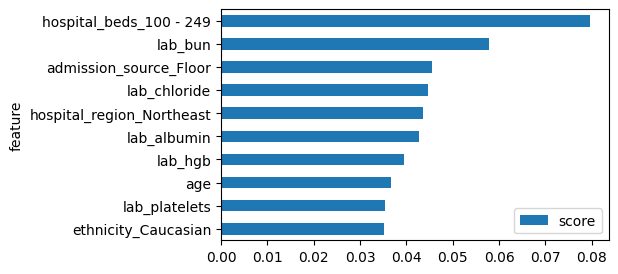

In [30]:
F_df = pd.DataFrame({'feature': df_processed.columns.tolist(), 'score': F}).sort_values(by='score').tail(10)
F_df.plot.barh(x='feature', y='score', figsize=(5,3))

By examining the model's learned feature importance scores, we can better understand influential model inputs and begin to have an idea of what information the model is weighting most heavily when it makes its predictions.

## 🍰 Deep Learning
**Deep learning** (DL) is the subfield of AI associated with using artificial neural networks (ANNs) to learn complex, hierarchical relationships from raw data. DL works particularly well with access to large-scale, unstructured datasets (such as text or images), state-of-the-art generative AI approaches are all built on deep learning foundations.

<center>
<img width="75%" src="https://www.dropbox.com/scl/fi/vk00tag6vd62ylegziv26/ama_ai_ml_dl.png?rlkey=n56rukp56uo66aiudj9x57ugz&st=bnp3gsxw&raw=1">
<br>
<b>Relationship between AI, ML, and DL.</b><sup><a href="https://www.ama-assn.org/system/files/future-health-augmented-intelligence-health-care.pdf">ref</a></sup>
</center>


> **📌 Note:** The American Medical Association uses the term "augmented intelligence" to emphasize AI's capability to assist human intelligence (rather than replace it.)

## 🧠 Biological Neurons
The architecture of artificial neural networks was originally inspired by the structural anatomy of a biological neuron.  In a living brain, billions of neurons are connected together, forming a dense and complex network.

<figure><img src="https://www.dropbox.com/scl/fi/129imwhndo9qmb2284z42/nn.png?rlkey=l2kbawn7gbx9aw9xcc33qvgez&raw=1" />
    <figcaption style="text-align:center;font-weight:bold;">
        Biological neurons and their artificial counterparts. (<a href="https://medium.com/towards-data-science/the-concept-of-artificial-neurons-perceptrons-in-neural-networks-fab22249cbfc">Source</sup></a>)
    </figcaption>
</figure>

**🧠 Biological neurons...**
* Use electrical and chemical signals to pass information between different regions of the brain.
* Receive information through their dendrites and cell body.
* Transmit eletrical signals down their axons which triggers the release of neurotransmitters through their axon terminals.

In the context of ANNs, these processes are comparable to the flow of data, information, and error signals resulting from data samples being passed to the network's input layer.

## 🤖 Perceptrons (Artificial Neurons)

A perceptron is a type of artificial neuron or computational unit used in artificial neural networks. A perceptron - also known as a *node* in deep learning - contains two functions, a net input function that sums up incoming inputs and an **activation** function.

**Perceptrons...**
* Are one of the simplest ANNs.
* Were inspired by biological neurons.
* Receive information through the lines (weights) displayed to the left.
* Apply an activation function to their received signal and output the result.

<center>
    <img width="45%" src="https://www.dropbox.com/scl/fi/05nw0s7gntvqytntwnopr/perceptron.png?rlkey=1ypvw4pza2mzop50pn3oj4464&st=cila6y0n&raw=1">
    <br>
    <b>Anatomy of an artificial neuron.</b><a href="https://www.sharpsightlabs.com/blog/perceptrons-explained/"> (Source)</a>
</center>



## 💥 Activation Functions
The choice of activation function is important as it can have a major impact on how well your model trains. Also, the non-linear transformation applied by activation functions allows networks to model a wide variety of non-linear problems.

**Activation functions..**
* Are simple functions that transforms input values.
* Are used in ANNs to map neuron inputs to neuron outputs (also fittingly referred to as neuron *activations*).

<center>
    <img width="80%" src="https://www.dropbox.com/scl/fi/fx454ufxi9l7vkx7byqvk/activations.png?rlkey=fnxucmlnqxx7gs6a2ikgxrkkd&st=1ppl2pv6&raw=1">
    <br>
    <b>A handful of common activations used in artificial neural networks.</b><a href="https://iq.opengenus.org/linear-activation-function/"> (Source)</a>
</center>

> **✏️ Exercise:** Given a single neuron with input **x**, write a simple **linear activation** function using two lines of code.

In [31]:
# Write code to replicate a simple linear activation function (technically requires just two lines of code).


> **✏️ Exercise:** Given a single neuron with input **x**, write a simple **ReLU activation** function using two lines of code. **Hint:** we can use the built-in Python function `max`. When you pass two numbers `a` and `b` into the max function as `max(a,b)`, the function will return the larger value. *Examples:* <code>max(-2, 3) = 3</code> or <code>max(1.5, 1.1) = 1.5</code>

In [32]:
# Write your code for a simple ReLU activation function in this code block.


> **🤔 Question:** Is the ReLU a **linear** or **nonlinear** activation function?

In [33]:
# Explain why the ReLU activation function is either linear or nonlinear.


## 🤖 Artificial Neural Networks (ANNs)
An artificial neural network (ANN) is comprised of artificial neurons connected together in layers.

**ANNs are...**
* A subset of machine learning that can be used to model a wide range of problems.
* Composed of a collection of interconnected connected nodes that accept an input and produce an output.
* A fundamental component of deep learning.

<center><img src="https://www.dropbox.com/scl/fi/giovd8eoxe4lqt909z1zu/neural_network_im.jpg?rlkey=1888k0v4ubl3xkerkynxin7lb&st=wew7obpw&raw=1" width="55%" /></center>
<center><b>Graphical representation of an artificial neural network.</b> (<a href="https://www.analyticsvidhya.com/blog/2016/08/evolution-core-concepts-deep-learning-neural-networks">Source</a>)</center>

## 🏋️‍♂️ Training a Neural Network

Training a neural network is the process of teaching the model to perform a specific task or learn a particular pattern from a given set of training data. It involves adjusting the model's internal parameters or weights to minimize the difference between its predictions and the desired outputs.

✅ Assuming that training data has been prepared, the training process includes the following steps:

1. **Forward Propagation:** The training data is fed into the model, and its input features are multiplied by the weights and passed through activation functions in each layer.
2. **Loss (Error) Calculation:** The loss function calculates the network's total error, the difference between the model's predictions and the actual target values.
3. **Backpropagation:** The gradients of the loss function with respect to the model's parameters are computed using the chain rule of calculus.
4. **Parameter / Weight Update:**  The model's parameters are updated using optimization algorithms like stochastic gradient descent (SGD) or its variants.
5. **Iterate:** Repeat the first four steps for each training run or epoch.  Each time we run through the entire training dataset, we say that we trained for one *epoch*.

# Creating an Artificial Neural Network (Multi-Layer Perceptron)
* An important part of an AI research project is evaluating different models to identify which works best for a given dataset and task.
* Let's train a deep learning model on the dataset from our machine learning notebook.
* This time, we'll be using a deep learning (DL) model that uses an artificial neural network called the multi-layer perceptron (MLP).
* We will be using the user-friendly Python library `Keras` to build our MLP model.

A full description of DL or the MLP is beyond the scope of this lesson. We refer interested learners to [Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press](https://www.deeplearningbook.org).

> **🎗️Knowledge check:**
> * Artificial neural networks were initially motivated by biological inspiration, but currently ANNs only loosely resemble the human brain.
> * A DL model like the MLP is often defined in terms of **layers** (one *input layer*, one or more *hidden layers*, and one *output layer*). The more hidden layers that are added to a model, the "deeper" it gets.
> * Each hidden layer is designed to transform the data from the layer before.
> * The final layer learns to predict an outcome based on all of these transformations.

<center><img src="https://www.dropbox.com/scl/fi/27iyriaiouh10o3431hfv/ann.jpg?rlkey=ue3geqit5t6zzf6enitchhs6h&st=m1wjj1pk&raw=1" width="40%"></center>
<center><b>A typical artificial neural network model contains one input layer, one output layer, and one or more hidden layers.</b></center>

First, let's load our dataset and split it into training and testing sets. (You likely saw this in a previous module, so we'll skip the explanation).

Just to change things up a bit, let's use **70% of the dataset to train** our model and **30% of the dataset to test** our model. (Last time we used *80%* for training and *20%* for testing.)

We will accomplish this in the `train_test_split` function by changing the `test_size` parameter to be equal to `0.3`, representing **30%**.

In [34]:
# Split X and y into training and testing sets, this time using 30% for testing (and 70% for training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2025)

Let's create our first MLP model with the following specification:
* An input layer with `50` units (one per input variable)
* `1` hidden layer with `128` hidden units
* An additional `1` hidden layer with `64` units
* An output layer with `1` unit (for predicting 0 or 1 corresponding to our AKI outcome)

In [35]:
#from tensorflow.keras import layers
#from tensorflow.keras import Sequential
import os
from keras import layers, Sequential

model = Sequential()
# Add the first hidden layer with 128 neurons (and implicitly create the input layer by specifying the "input_dim")
model.add(layers.Dense(units=128, input_dim=50, activation='relu'))

# Add the second hidden layer with 64 neurons
model.add(layers.Dense(units=64, activation='relu'))

# Add the output layer
model.add(layers.Dense(units=1, activation='sigmoid'))

# Compile the model for a classification problem such as ours.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 🕵️ A Closer Look
Each hidden layer of our neural network will be created using the **Dense** class from Keras. For each layer, we must define the number of hidden units (also known as neurons). There are several optional arguments we may also pass, which can be viewed in the [Keras documentation page](https://keras.io/api/layers/core_layers/dense/). We can add many layers to our deep learning model using the .add() function of the Sequential class. You can think of a Sequential container as a list of hidden layers.

For the first layer of our neural network, we must tell Keras how many variables to expect in each input vector. From our previous data exploration, we know that each patient is defined by `50` different variables, so the input dimension to our network is `50`.

One reason why deep learning models are so powerful is their ability to model complex variable interactions through nonlinear activation functions. We have several choices for activation function. In our example, we will use the commonly chosen Rectified Linear Unit activation (ReLU).

Once we are satisfied with the hidden layers of our model, we need to add an output layer for generating class predictions. Our output layer will also be a Dense layer, but it will only have a single (1) unit. Instead of ReLU, we will use a sigmoid activation function, which is typically chosen for binary classification problems such as ours. Using a sigmoid activation on our output layer allows us to interpret the output as a prediction probability. In other words, the probability that a given input vector belongs to class 1.

Now that we have defined the architecture of our neural network, we will use the .compile() function to build it. In our example we are defining a few arguments that are associated with the training of our model:
* We are using a binary cross-entropy loss. This is an appropriate choise for binary classification.
* We will be using the Adam optimizer, which is a popular version of stochastic gradient descent (SGD).
* For this example, we are interested in our model's prediction accuracy, so we'll tell Keras to use the "accuracy" metric.

## 🏋️‍♂️ Training our neural network

Now it's time to train our prediction model! We will train (or, "fit") the model using our training dataset that we developed in a previous module.
* We will use the one-line function `.fit()` to train our entire deep learning model.
* We will specify some additional parameters to be used during the training process:
    * We will tell Keras to train the model for `10` epochs.
    * We will use a batch size of `64` samples. During each epoch, the model will pass in `64` samples at a time.
    * We will use a random `30%` of the training dataset as our **validation set** (different from the test set) for computing metrics while training.

In [36]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split= 0.3)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.6320 - loss: 0.6230 - val_accuracy: 0.8972 - val_loss: 0.3483
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9325 - loss: 0.2674 - val_accuracy: 0.8972 - val_loss: 0.3374
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9270 - loss: 0.2403 - val_accuracy: 0.8993 - val_loss: 0.3055
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9337 - loss: 0.1951 - val_accuracy: 0.9015 - val_loss: 0.2988
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9239 - loss: 0.2045 - val_accuracy: 0.9015 - val_loss: 0.2942
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9370 - loss: 0.1760 - val_accuracy: 0.8993 - val_loss: 0.2911
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9332 - loss: 0.1621 - val_accuracy: 0.8993 - val_loss: 0.2886
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9364 - loss: 0.1708 - val_accuracy: 0.9015 - val_loss

### **🎉 Done!**
Before we celebrate too much, let's check the performance of our trained model on the test set that we already set aside.

**The model has never seen this particular data**, so our trained model's performance on the test set can provide us with an idea of how well the model might perform in the future (i.e., ***generalizability to unseen data***, one of the fundamental goals of machine learning).

We will use our model's `.evaluate()` function to compute the loss, as well as any metrics that we defined when compiling our model.

Since we told Keras to use `accuracy` when we compiled the model, we will also see the model's accuracy on the test data.

In [37]:
scores = model.evaluate(X_test, y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9143 - loss: 0.2725


> **✏️ Exercise:** Develop an MLP with `3` hidden layers (instead of 2), with the following number of neurons in each hidden layer:
> * Hidden layer 1: `512` neurons
> * Hidden layer 2: `256` neurons
> * Hidden layer 3: `128` neurons

> Create, compile, train, and evaluate this new MLP model.

In [38]:
# Code it! (feel free to re-use most of the code from before)


> **✏️ Exercise:** Create an MLP with `8` hidden layers (instead of 3), with **any number** of neurons in each hidden layer (get creative!). Code, compile, train, and evaluate this new MLP model.

In [39]:
# Code your own personal multilayer perceptron (MLP) in this code block.


**🏆 This concludes our tutorial.** Please see the offical documentation pages for [scikit-learn](https://scikit-learn.org/stable/), [XGBoost](https://xgboost.readthedocs.io/en/stable/), [Keras](https://keras.io/), [PyTorch](https://pytorch.org/docs/stable/index.html), and [TensorFlow](https://www.tensorflow.org/) for more information and examples of developing machine learning models in Python.